In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('modeldata.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df.drop(columns=['Grade','home_ownership','verification_status','purpose','addr_state','Zscore','sub_grade'],inplace=True)

KeyError: "['Grade' 'home_ownership' 'verification_status' 'purpose' 'addr_state'\n 'Zscore' 'sub_grade'] not found in axis"

In [ ]:
# logistic
# dtc,rfc,Naive-Bayes,KNN
# Gradientboosting,XGBoost,adaboost,(catboost)
# VOting classification

In [47]:
df1=pd.get_dummies(df['emp_title'],drop_first=True)

In [50]:
maindf=pd.concat([df,df1],axis=1)

In [52]:
maindf.drop(columns=['batch_enrolled','emp_title'],inplace=True)

In [91]:
maindf[maindf['tot_coll_amt'] == np.inf]

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Driver,Engineer,Manager,Not Available,Nurse,Others,Owner,Public Coordinator,Technician


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.drop(columns=['loan_status'])
y = df['loan_status']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression().fit(x_train,y_train)

In [22]:
pre_train = logmodel.predict(x_train)

In [23]:
pre_train

array([0, 0, 0, ..., 0, 0, 0])

# Model accuracy for Training data

In [24]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score,confusion_matrix

In [25]:
acc = accuracy_score(y_train,pre_train)

In [26]:
acc

0.765675670021131

In [27]:
print(classification_report(y_train,pre_train))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     36479
           1       0.66      0.02      0.04     11318

    accuracy                           0.77     47797
   macro avg       0.71      0.51      0.45     47797
weighted avg       0.74      0.77      0.67     47797



In [28]:
confusion_matrix(y_train,pre_train)

array([[36351,   128],
       [11072,   246]])

In [29]:
pre_train_prob = logmodel.predict_proba(x_train)

In [30]:
y_prob=pre_train_prob[:,1]

In [31]:
roc_auc_score(y_train,y_prob)

0.8381597313253515

In [32]:
tpr,fpr,tresh= roc_curve(y_train,y_prob)

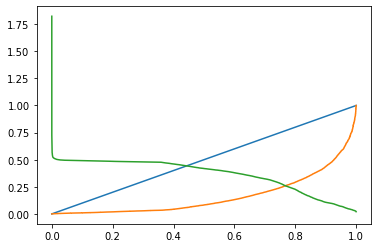

In [33]:
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.plot(fpr,tresh)

# Model accuracy for test data

In [34]:
y_test_pred = logmodel.predict(x_test)

In [35]:
accuracy_score(y_test,y_test_pred)

0.7611247097219607

In [36]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     12098
           1       0.61      0.02      0.04      3835

    accuracy                           0.76     15933
   macro avg       0.69      0.51      0.45     15933
weighted avg       0.73      0.76      0.67     15933



In [37]:
ytest_pred_prob = logmodel.predict_proba(x_test)

In [38]:
ytest_pred_prob = ytest_pred_prob[:,1]

In [39]:
ytest_pred_prob

array([0.02474509, 0.10887381, 0.07084465, ..., 0.0282929 , 0.21938354,
       0.4892201 ])

In [40]:
roc_auc_score(y_test,ytest_pred_prob)

0.8392829484891207

In [41]:
tpr1,fpr1,tresh1 = roc_curve(y_test,ytest_pred_prob)

In [42]:
tresh1[0] = tresh1[0] - 1

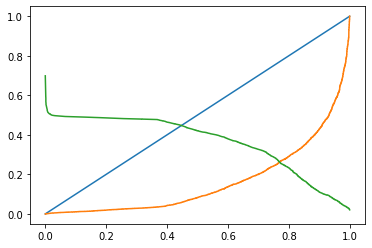

In [43]:
plt.plot(fpr1,fpr1)
plt.plot(fpr1,tpr1)
plt.plot(fpr1,tresh1)

In [142]:
maindf.to_csv('modeldata.csv')

# We have got accuracy of 0.76 , precision of 0.61 and roc_auc_score of 0.839 for the test data

In [47]:
confusion_matrix(y_test,y_test_pred)

array([[12047,    51],
       [ 3755,    80]])

In [51]:
tn = 12047
tp = 80
fp = 51
fn = 3755

In [54]:
precision = (tp/(tp+fp))
precision

0.6106870229007634

In [ ]:
# recall = tpr = sensitivity

In [55]:
recall = (tp/(tp+fn))
recall

0.020860495436766623

In [56]:
fpr = (fp/(fp+tn))
fpr

0.004215572821954042

# We got very low fpr but tpr value is not satisfactory

# Decision tree for training data

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtc = DecisionTreeClassifier().fit(x_train,y_train)

In [59]:
y_pred_traindc = dtc.predict(x_train)

In [60]:
accuracy_score(y_train,y_pred_traindc)

1.0

In [61]:
print(classification_report(y_train,y_pred_traindc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36479
           1       1.00      1.00      1.00     11318

    accuracy                           1.00     47797
   macro avg       1.00      1.00      1.00     47797
weighted avg       1.00      1.00      1.00     47797



In [62]:
print(confusion_matrix(y_train,y_pred_traindc))

[[36479     0]
 [    0 11318]]


In [63]:
y_prob_traindc = dtc.predict_proba(x_train)

In [64]:
y_prob_traindc = y_prob_traindc[:,1]

In [65]:
roc_auc_score(y_train,y_prob_traindc)

1.0

In [66]:
fpr,tpr,tresh = roc_curve(y_train,y_prob_traindc)

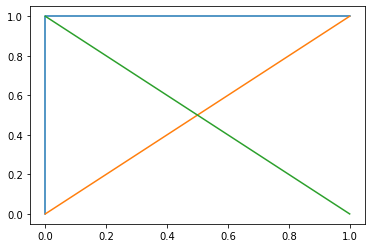

In [71]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.plot(fpr,tresh)
plt.show()

In [68]:
tresh[0] = tresh[0] - 1

# Decision tree for testing data

In [72]:
y_test_preddc = dtc.predict(x_test)

In [73]:
accuracy_score(y_test,y_test_preddc)

0.9013368480512145

In [75]:
print(classification_report(y_test,y_test_preddc))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     12098
           1       0.79      0.80      0.80      3835

    accuracy                           0.90     15933
   macro avg       0.86      0.87      0.87     15933
weighted avg       0.90      0.90      0.90     15933



In [76]:
print(confusion_matrix(y_test,y_test_preddc))

[[11299   799]
 [  773  3062]]


In [77]:
y_test_probdc = dtc.predict_proba(x_test)[:,1]

In [78]:
roc_auc_score(y_test,y_test_probdc)

0.8661957443158146

In [79]:
fpr,tpr,tresh = roc_curve(y_test,y_test_probdc)

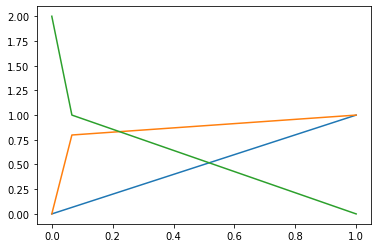

In [82]:
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.plot(fpr,tresh)

# Model is performing excellent in traing data but not comparitively good in testing data . So model is overfit

# Random forest for testing data

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier().fit(x_train,y_train)

In [398]:
y_pred_trainrf = rfc.predict(x_train)

In [399]:
accuracy_score(y_train,y_pred_trainrf)

1.0

In [400]:
print(classification_report(y_train,y_pred_trainrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36479
           1       1.00      1.00      1.00     11318

    accuracy                           1.00     47797
   macro avg       1.00      1.00      1.00     47797
weighted avg       1.00      1.00      1.00     47797



In [401]:
print(confusion_matrix(y_train,y_pred_trainrf))

[[36479     0]
 [    0 11318]]


In [395]:
y_pred_testrf = rfc.predict(x_test)

In [396]:
accuracy_score(y_test,y_pred_testrf)

0.8933659699993723

In [397]:
print(classification_report(y_test,y_pred_testrf))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     12098
           1       0.90      0.63      0.74      3835

    accuracy                           0.89     15933
   macro avg       0.89      0.80      0.84     15933
weighted avg       0.89      0.89      0.89     15933



In [106]:
y_prod_testrf = rfc.predict_proba(x_test)[:,1]

In [107]:
roc_auc_score(y_test,y_prod_testrf)

0.9999999999999999

In [109]:
confusion_matrix(y_test,y_pred_testrf)

array([[12098,     0],
       [    0,  3835]])

# Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB

In [124]:
nb = GaussianNB().fit(x_train,y_train)

In [125]:
y_pred_trainnb = nb.predict(x_train)

In [126]:
accuracy_score(y_train,y_pred_trainnb)

0.7908864573090362

In [127]:
print(classification_report(y_train,y_pred_trainnb))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     36479
           1       0.55      0.67      0.60     11318

    accuracy                           0.79     47797
   macro avg       0.72      0.75      0.73     47797
weighted avg       0.81      0.79      0.80     47797



In [128]:
y_test_prednb = nb.predict(x_test)

In [129]:
accuracy_score(y_test,y_test_prednb)

0.7857904977091571

In [130]:
print(classification_report(y_test,y_test_prednb))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85     12098
           1       0.54      0.67      0.60      3835

    accuracy                           0.79     15933
   macro avg       0.72      0.75      0.73     15933
weighted avg       0.81      0.79      0.79     15933



In [131]:
print(confusion_matrix(y_test,y_test_prednb))

[[9938 2160]
 [1253 2582]]


# Boosting Algorithms

In [144]:
# Adaboost

In [145]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.ensemble import 

In [150]:
abc = AdaBoostClassifier(n_estimators=100).fit(x_train,y_train)

In [151]:
y_train_predabc = abc.predict(x_train)

In [152]:
accuracy_score(y_train,y_train_predabc)

0.8966462330271774

In [153]:
print(classification_report(y_train,y_train_predabc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     36479
           1       0.90      0.64      0.74     11318

    accuracy                           0.90     47797
   macro avg       0.90      0.81      0.84     47797
weighted avg       0.90      0.90      0.89     47797



In [154]:
print(confusion_matrix(y_train,y_train_predabc))

[[35642   837]
 [ 4103  7215]]


In [157]:
y_train_probabc = abc.predict_proba(x_train)[:,1]

In [158]:
roc_auc_score(y_train,y_train_probabc)

0.9435172904418411

In [160]:
tpr,fpr,tresh = roc_curve(y_train,y_train_probabc)

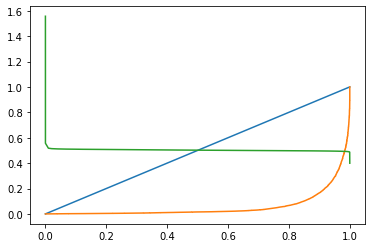

In [161]:
plt.plot(fpr,fpr)
plt.plot(fpr,tpr)
plt.plot(fpr,tresh)

In [162]:
y_test_predabc = abc.predict(x_test)

In [163]:
accuracy_score(y_test,y_test_predabc)

0.8920479507939497

In [164]:
print(classification_report(y_test,y_test_predabc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     12098
           1       0.88      0.64      0.74      3835

    accuracy                           0.89     15933
   macro avg       0.89      0.80      0.84     15933
weighted avg       0.89      0.89      0.89     15933



In [165]:
y_test_probabc = abc.predict_proba(x_test)[:,1]

In [166]:
roc_auc_score(y_test,y_test_probabc)

0.9407337685304908

In [167]:
# XGBoost

In [170]:
from xgboost import 

In [171]:
xg = XGBClassifier().fit(x_train,y_train)

In [172]:
y_train_predxg = xg.predict(x_train)

In [173]:
accuracy_score(y_train,y_train_predxg)

0.9190744188965835

In [174]:
print(classification_report(y_train,y_train_predxg))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     36479
           1       0.89      0.75      0.81     11318

    accuracy                           0.92     47797
   macro avg       0.91      0.86      0.88     47797
weighted avg       0.92      0.92      0.92     47797



In [175]:
y_test_predxg = xg.predict(x_test)

In [176]:
accuracy_score(y_test,y_test_predxg)

0.9169020272390636

In [177]:
print(confusion_matrix(y_test,y_test_predxg))

[[11740   358]
 [  966  2869]]


In [178]:
print(classification_report(y_test,y_test_predxg))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12098
           1       0.89      0.75      0.81      3835

    accuracy                           0.92     15933
   macro avg       0.91      0.86      0.88     15933
weighted avg       0.92      0.92      0.91     15933



In [179]:
# Lightgbm

In [180]:
from lightgbm import L

In [181]:
lgb = LGBMClassifier().fit(x_train,y_train)

In [182]:
y_train_predlgb = lgb.predict(x_train)

In [183]:
accuracy_score(y_train,y_train_predlgb)

0.9452057660522627

In [185]:
print(classification_report(y_train,y_train_predlgb))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     36479
           1       0.89      0.88      0.88     11318

    accuracy                           0.95     47797
   macro avg       0.92      0.92      0.92     47797
weighted avg       0.95      0.95      0.95     47797



print(confusion_matrix(y_train,y_train_predlgb))

In [187]:
y_test_predlgb = lgb.predict(x_test)

In [188]:
accuracy_score(y_test,y_test_predlgb)

0.9340990397288647

In [189]:
print(classification_report(y_test,y_test_predlgb))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12098
           1       0.87      0.86      0.86      3835

    accuracy                           0.93     15933
   macro avg       0.91      0.91      0.91     15933
weighted avg       0.93      0.93      0.93     15933



In [190]:
print(confusion_matrix(y_test,y_test_predlgb))

[[11583   515]
 [  535  3300]]


In [191]:
from catboost import CatBoostClassifier

In [192]:
cb = CatBoostClassifier().fit(x_test,y_test)

Learning rate set to 0.033598
0:	learn: 0.6638092	total: 109ms	remaining: 1m 48s
1:	learn: 0.6355441	total: 155ms	remaining: 1m 17s
2:	learn: 0.6094305	total: 183ms	remaining: 1m
3:	learn: 0.5860324	total: 252ms	remaining: 1m 2s
4:	learn: 0.5672398	total: 280ms	remaining: 55.7s
5:	learn: 0.5464660	total: 304ms	remaining: 50.4s
6:	learn: 0.5284018	total: 330ms	remaining: 46.8s
7:	learn: 0.5140543	total: 352ms	remaining: 43.6s
8:	learn: 0.4984690	total: 372ms	remaining: 40.9s
9:	learn: 0.4863027	total: 390ms	remaining: 38.6s
10:	learn: 0.4731927	total: 405ms	remaining: 36.4s
11:	learn: 0.4600334	total: 427ms	remaining: 35.2s
12:	learn: 0.4474175	total: 444ms	remaining: 33.7s
13:	learn: 0.4353747	total: 476ms	remaining: 33.5s
14:	learn: 0.4263227	total: 515ms	remaining: 33.8s
15:	learn: 0.4187126	total: 532ms	remaining: 32.7s
16:	learn: 0.4104695	total: 554ms	remaining: 32s
17:	learn: 0.4022980	total: 585ms	remaining: 31.9s
18:	learn: 0.3936382	total: 723ms	remaining: 37.3s
19:	learn: 0.3

166:	learn: 0.2129945	total: 5.38s	remaining: 26.8s
167:	learn: 0.2127423	total: 5.4s	remaining: 26.8s
168:	learn: 0.2125966	total: 5.45s	remaining: 26.8s
169:	learn: 0.2124725	total: 5.46s	remaining: 26.7s
170:	learn: 0.2124045	total: 5.49s	remaining: 26.6s
171:	learn: 0.2123030	total: 5.51s	remaining: 26.5s
172:	learn: 0.2120443	total: 5.53s	remaining: 26.4s
173:	learn: 0.2119640	total: 5.54s	remaining: 26.3s
174:	learn: 0.2118812	total: 5.56s	remaining: 26.2s
175:	learn: 0.2116592	total: 5.58s	remaining: 26.1s
176:	learn: 0.2112889	total: 5.61s	remaining: 26.1s
177:	learn: 0.2109652	total: 5.63s	remaining: 26s
178:	learn: 0.2108601	total: 5.65s	remaining: 25.9s
179:	learn: 0.2107332	total: 5.68s	remaining: 25.9s
180:	learn: 0.2105877	total: 5.7s	remaining: 25.8s
181:	learn: 0.2105492	total: 5.71s	remaining: 25.7s
182:	learn: 0.2103196	total: 5.73s	remaining: 25.6s
183:	learn: 0.2101915	total: 5.75s	remaining: 25.5s
184:	learn: 0.2101007	total: 5.77s	remaining: 25.4s
185:	learn: 0.20

331:	learn: 0.1858274	total: 12.4s	remaining: 24.9s
332:	learn: 0.1856529	total: 12.4s	remaining: 24.9s
333:	learn: 0.1855147	total: 12.6s	remaining: 25.2s
334:	learn: 0.1853065	total: 12.7s	remaining: 25.3s
335:	learn: 0.1850977	total: 12.8s	remaining: 25.3s
336:	learn: 0.1848717	total: 12.8s	remaining: 25.2s
337:	learn: 0.1847797	total: 12.8s	remaining: 25.1s
338:	learn: 0.1845284	total: 12.9s	remaining: 25.1s
339:	learn: 0.1844282	total: 13s	remaining: 25.2s
340:	learn: 0.1843538	total: 13.1s	remaining: 25.3s
341:	learn: 0.1841285	total: 13.2s	remaining: 25.5s
342:	learn: 0.1840260	total: 13.3s	remaining: 25.4s
343:	learn: 0.1836242	total: 13.3s	remaining: 25.3s
344:	learn: 0.1831893	total: 13.4s	remaining: 25.5s
345:	learn: 0.1828879	total: 13.4s	remaining: 25.4s
346:	learn: 0.1826411	total: 13.5s	remaining: 25.3s
347:	learn: 0.1825429	total: 13.5s	remaining: 25.3s
348:	learn: 0.1822438	total: 13.5s	remaining: 25.2s
349:	learn: 0.1821710	total: 13.5s	remaining: 25.1s
350:	learn: 0.

491:	learn: 0.1630958	total: 17.9s	remaining: 18.5s
492:	learn: 0.1629780	total: 18s	remaining: 18.5s
493:	learn: 0.1629342	total: 18s	remaining: 18.4s
494:	learn: 0.1628846	total: 18s	remaining: 18.4s
495:	learn: 0.1628729	total: 18s	remaining: 18.3s
496:	learn: 0.1627619	total: 18.1s	remaining: 18.3s
497:	learn: 0.1627213	total: 18.1s	remaining: 18.2s
498:	learn: 0.1626316	total: 18.1s	remaining: 18.2s
499:	learn: 0.1625491	total: 18.2s	remaining: 18.2s
500:	learn: 0.1623657	total: 18.2s	remaining: 18.1s
501:	learn: 0.1623320	total: 18.2s	remaining: 18.1s
502:	learn: 0.1621763	total: 18.3s	remaining: 18.1s
503:	learn: 0.1620028	total: 18.4s	remaining: 18.1s
504:	learn: 0.1619119	total: 18.4s	remaining: 18s
505:	learn: 0.1617119	total: 18.4s	remaining: 18s
506:	learn: 0.1616430	total: 18.5s	remaining: 18s
507:	learn: 0.1614843	total: 18.5s	remaining: 17.9s
508:	learn: 0.1614263	total: 18.6s	remaining: 17.9s
509:	learn: 0.1613717	total: 18.6s	remaining: 17.8s
510:	learn: 0.1612648	tota

655:	learn: 0.1474375	total: 22.8s	remaining: 11.9s
656:	learn: 0.1472857	total: 22.8s	remaining: 11.9s
657:	learn: 0.1472182	total: 22.8s	remaining: 11.9s
658:	learn: 0.1470396	total: 22.8s	remaining: 11.8s
659:	learn: 0.1469259	total: 22.9s	remaining: 11.8s
660:	learn: 0.1468742	total: 22.9s	remaining: 11.7s
661:	learn: 0.1468229	total: 22.9s	remaining: 11.7s
662:	learn: 0.1467510	total: 22.9s	remaining: 11.6s
663:	learn: 0.1466713	total: 22.9s	remaining: 11.6s
664:	learn: 0.1466491	total: 22.9s	remaining: 11.6s
665:	learn: 0.1465221	total: 23s	remaining: 11.5s
666:	learn: 0.1463888	total: 23s	remaining: 11.5s
667:	learn: 0.1463010	total: 23s	remaining: 11.4s
668:	learn: 0.1462049	total: 23s	remaining: 11.4s
669:	learn: 0.1460466	total: 23.1s	remaining: 11.4s
670:	learn: 0.1459043	total: 23.1s	remaining: 11.3s
671:	learn: 0.1458308	total: 23.1s	remaining: 11.3s
672:	learn: 0.1456839	total: 23.1s	remaining: 11.2s
673:	learn: 0.1455934	total: 23.1s	remaining: 11.2s
674:	learn: 0.145532

815:	learn: 0.1342623	total: 28s	remaining: 6.32s
816:	learn: 0.1342338	total: 28.2s	remaining: 6.32s
817:	learn: 0.1341602	total: 28.4s	remaining: 6.31s
818:	learn: 0.1341471	total: 28.4s	remaining: 6.27s
819:	learn: 0.1340673	total: 28.4s	remaining: 6.24s
820:	learn: 0.1340020	total: 28.4s	remaining: 6.2s
821:	learn: 0.1339242	total: 28.5s	remaining: 6.17s
822:	learn: 0.1338403	total: 28.5s	remaining: 6.13s
823:	learn: 0.1337814	total: 28.5s	remaining: 6.1s
824:	learn: 0.1336888	total: 28.6s	remaining: 6.06s
825:	learn: 0.1336412	total: 28.6s	remaining: 6.03s
826:	learn: 0.1335180	total: 28.7s	remaining: 5.99s
827:	learn: 0.1334958	total: 28.7s	remaining: 5.96s
828:	learn: 0.1334129	total: 28.7s	remaining: 5.93s
829:	learn: 0.1333767	total: 28.8s	remaining: 5.89s
830:	learn: 0.1333341	total: 28.8s	remaining: 5.86s
831:	learn: 0.1333086	total: 28.8s	remaining: 5.82s
832:	learn: 0.1332629	total: 28.8s	remaining: 5.78s
833:	learn: 0.1331562	total: 28.9s	remaining: 5.74s
834:	learn: 0.13

983:	learn: 0.1231662	total: 33.9s	remaining: 550ms
984:	learn: 0.1230538	total: 33.9s	remaining: 516ms
985:	learn: 0.1230220	total: 33.9s	remaining: 481ms
986:	learn: 0.1229885	total: 33.9s	remaining: 447ms
987:	learn: 0.1229247	total: 33.9s	remaining: 412ms
988:	learn: 0.1229163	total: 34s	remaining: 378ms
989:	learn: 0.1228331	total: 34s	remaining: 343ms
990:	learn: 0.1227914	total: 34s	remaining: 309ms
991:	learn: 0.1227744	total: 34s	remaining: 274ms
992:	learn: 0.1227532	total: 34s	remaining: 240ms
993:	learn: 0.1226826	total: 34s	remaining: 206ms
994:	learn: 0.1225841	total: 34.1s	remaining: 171ms
995:	learn: 0.1225310	total: 34.1s	remaining: 137ms
996:	learn: 0.1224883	total: 34.1s	remaining: 103ms
997:	learn: 0.1224589	total: 34.2s	remaining: 68.5ms
998:	learn: 0.1223410	total: 34.2s	remaining: 34.2ms
999:	learn: 0.1222352	total: 34.2s	remaining: 0us


In [193]:
y_test_predcb = cb.predict(x_test)

In [194]:
accuracy_score(y_test,y_test_predcb)

0.9550618213770162

In [195]:
print(classification_report(y_test,y_test_predcb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     12098
           1       0.92      0.89      0.91      3835

    accuracy                           0.96     15933
   macro avg       0.94      0.93      0.94     15933
weighted avg       0.95      0.96      0.95     15933



In [196]:
print(confusion_matrix(y_test,y_test_predcb))

[[11801   297]
 [  419  3416]]


# Voting Classifier

In [197]:
from sklearn.ensemble import V

In [216]:
lr =LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()


In [217]:
est ={
    'lr':lr,
    'dt':dt,
    'rf':rf,
    'knn':knn
    
}

In [221]:
vc12 = VotingClassifier(estimators=[('lr', lr),('dt',dt),('rf', rf),('knn',knn)],voting='soft',n_jobs=-1).fit(x_train,y_train)

In [222]:
y_pred_trainvc = vc12.predict(x_train)

In [223]:
accuracy_score(y_train,y_pred_trainvc)

0.9880536435341131

In [224]:
print(confusion_matrix(y_train,y_pred_trainvc))

[[36479     0]
 [  571 10747]]


In [225]:
print(classification_report(y_train,y_pred_trainvc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     36479
           1       1.00      0.95      0.97     11318

    accuracy                           0.99     47797
   macro avg       0.99      0.97      0.98     47797
weighted avg       0.99      0.99      0.99     47797



In [226]:
y_train_probvc = vc12.predict_proba(x_train)[:,1]

In [227]:
roc_auc_score(y_train,y_train_probvc)

1.0

In [228]:
y_test_predvc = vc12.predict(x_test)

In [229]:
accuracy_score(y_test,y_test_predvc)

0.8912947969622795

In [230]:
print(confusion_matrix(y_test,y_test_predvc))

[[11758   340]
 [ 1392  2443]]


In [231]:
print(classification_report(y_test,y_test_predvc))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     12098
           1       0.88      0.64      0.74      3835

    accuracy                           0.89     15933
   macro avg       0.89      0.80      0.83     15933
weighted avg       0.89      0.89      0.88     15933



In [234]:
df['loan_status'].value_counts()

0    48577
1    15153
Name: loan_status, dtype: int64

In [235]:
# knn

In [236]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

In [239]:
ss = StandardScaler()

In [240]:
x_train_ss = ss.fit_transform(x_train)

In [241]:
x_train_ss

array([[ 0.61779967,  0.20469004,  0.20630517, ..., -0.17100486,
        -0.26457936,  1.79394839],
       [-0.9894342 ,  0.52950692,  0.53064819, ..., -0.17100486,
        -0.26457936, -0.55742964],
       [-1.41252494, -0.16119585, -0.16748023, ..., -0.17100486,
        -0.26457936,  1.79394839],
       ...,
       [ 1.51023436,  0.20469004,  0.20630517, ..., -0.17100486,
         3.77958429, -0.55742964],
       [-1.29002736, -0.43627612, -0.43046383, ..., -0.17100486,
        -0.26457936, -0.55742964],
       [-1.37864819, -0.10630776, -0.10322454, ..., -0.17100486,
        -0.26457936, -0.55742964]])

In [244]:
x_train_ssdf = pd.DataFrame(x_train_ss,columns=x_train.columns)

In [245]:
x_train_ssdf

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Driver,Engineer,Manager,Not Available,Nurse,Others,Owner,Public Coordinator,Technician
0,0.617800,0.204690,0.206305,1.528218,1.278941,1.135108,-0.130705,-0.988164,-0.365471,-0.700026,2.993764,1.586862,1.462929,-0.657166,-0.874088,0.149154,0.412170,-0.087796,-0.115895,-0.071991,-0.527170,-0.066783,-0.486344,-1.328921,-0.260633,-0.635787,-0.621113,-0.431107,3.423264,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,-0.329535,1.214597,-0.764847,1.425967,-0.256567,-0.298151,-0.549753,0.829629,-0.015847,-0.404854,1.813145,-0.589777,-0.363189,1.027944,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,-0.592194,-0.171005,-0.264579,1.793948
1,-0.989434,0.529507,0.530648,1.528218,0.880668,-0.897471,-0.386911,0.073555,-0.365471,1.286977,3.058698,0.082609,-0.340621,0.642279,-1.387530,-0.864967,1.602166,-0.087796,-0.115895,-0.071991,1.152633,-0.066783,2.062188,-0.711258,0.458443,-0.635787,1.610012,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,3.034579,-0.823318,1.307451,-0.701278,-0.256567,-0.298151,1.818998,-1.205359,-0.015847,-0.404854,-0.551528,-0.589777,-0.363189,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,1.688636,-0.171005,-0.264579,-0.557430
2,-1.412525,-0.161196,-0.167480,-0.654357,-0.746755,-0.026366,-0.164134,-1.223624,-0.365471,1.286977,0.396431,-0.669517,-0.340621,0.137880,-0.887183,1.754845,-0.174354,-0.087796,-0.086537,-0.006290,-0.232069,-0.066783,2.062005,-0.303464,-0.922432,1.572855,-0.621113,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,-0.329535,1.214597,-0.764847,-0.701278,-0.256567,-0.298151,-0.549753,0.829629,-0.015847,2.470025,-0.551528,-0.589777,-0.363189,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,-0.592194,-0.171005,-0.264579,1.793948
3,-1.405627,0.175951,0.174779,1.528218,-0.060078,-0.026366,-0.021580,0.585781,-0.365471,1.286977,-0.123035,1.022767,-0.340621,1.492946,-0.055944,0.740724,1.551579,-0.087796,-0.115895,-0.071991,4.012837,-0.066783,2.055991,1.189918,-0.921624,-0.635787,1.610012,-0.431107,-0.292119,-0.165882,-0.075091,1.004424,-0.006469,-0.013723,-0.329535,-0.823318,-0.764847,1.425967,3.897614,-0.298151,-0.549753,-1.205359,-0.015847,-0.404854,-0.551528,-0.589777,2.753389,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,1.688636,-0.171005,-0.264579,-0.557430
4,1.183374,1.503415,1.505019,-0.654357,-0.394261,-0.026366,1.960814,-0.176523,-0.365471,-0.700026,-0.123035,-0.481485,-0.340621,2.228076,0.726832,-0.949477,0.057731,-0.087796,-0.115895,-0.071991,-0.935770,-0.066783,-0.486344,-0.001513,-0.690211,1.572855,-0.621113,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,3.034579,-0.823318,-0.764847,-0.701278,-0.256567,-0.298151,-0.549753,0.829629,-0.015847,-0.404854,1.813145,-0.589777,-0.363189,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,1.688636,-0.171005,-0.264579,-0.557430
5,1.246739,-0.436276,-0.430464,-0.654357,-0.517863,-0.316734,0.346935,-0.451027,-0.365471,0.293476,-0.123035,-0.857548,1.462929,-2.242630,-1.925373,-1.203007,-0.963310,-0.087796,-0.115895,-0.071991,-1.026570,-0.066783,-0.486344,-1.008547,0.128478,1.572855,-0.621113,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013

In [246]:
knn1 = KNeighborsClassifier().fit(x_train_ssdf,y_train)

In [ ]:
from sklearn.neighbors import K

In [248]:
y_train_predknn1 = knn1.predict(x_train_ssdf)

In [249]:
accuracy_score(y_train,y_train_predknn1)

0.8499696633679938

In [250]:
print(classification_report(y_train,y_train_predknn1))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     36479
           1       0.78      0.51      0.62     11318

    accuracy                           0.85     47797
   macro avg       0.82      0.73      0.76     47797
weighted avg       0.84      0.85      0.84     47797



In [253]:
x_test_ss = ss.fit_transform(x_test)

In [254]:
knn1 = KNeighborsClassifier().fit(x_test_ss,y_test)

In [255]:
y_test_predknn1 = knn1.predict(x_test_ss)

In [256]:
accuracy_score(y_test,y_test_predknn1)

0.8492437080273646

In [257]:
print(classification_report(y_test,y_test_predknn1))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     12098
           1       0.78      0.52      0.62      3835

    accuracy                           0.85     15933
   macro avg       0.82      0.74      0.76     15933
weighted avg       0.84      0.85      0.84     15933



In [258]:
# svc

In [259]:
svc1 = SVC().fit(x_train_ssdf,y_train)

In [260]:
y_train_predsvc = svc1.predict(x_train_ssdf)

In [261]:
accuracy_score(y_train,y_train_predsvc)

0.9103081783375526

In [262]:
print(classification_report(y_train,y_train_predsvc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     36479
           1       0.89      0.71      0.79     11318

    accuracy                           0.91     47797
   macro avg       0.90      0.84      0.87     47797
weighted avg       0.91      0.91      0.91     47797



In [510]:
Y_test_predsvc = svc1.predict(x_test_ss)

In [511]:
accuracy_score(y_test,Y_test_predsvc)

0.8924245277097848

In [512]:
print(classification_report(y_test,Y_test_predsvc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     12098
           1       0.86      0.66      0.75      3835

    accuracy                           0.89     15933
   macro avg       0.88      0.81      0.84     15933
weighted avg       0.89      0.89      0.89     15933



In [513]:
print(confusion_matrix(y_test,Y_test_predsvc))

[[11689   409]
 [ 1305  2530]]


In [ ]:
# 

# Hyper Parameter Tuning

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as randint

In [ ]:
LogisticRegression()

In [451]:
parmns3={
'penalty':['l1', 'l2', 'elasticnet', 'none'],
'tol':[0.0001,0.00001,0.000001,0.0000001],
'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [454]:
logrsv = RandomizedSearchCV(logmodel,parmns3,n_iter=50,n_jobs=-1,cv=5).fit(x_train,y_train)

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [455]:
logrsv.best_params_

{'tol': 1e-05, 'solver': 'newton-cg', 'penalty': 'l2'}

In [456]:
loghp = LogisticRegression(**logrsv.best_params_).fit(x_train,y_train)

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [457]:
y_train_predloghp = loghp.predict(x_train)

In [458]:
accuracy_score(y_train,y_train_predloghp)

0.8792602046153525

In [459]:
print(classification_report(y_train,y_train_predloghp))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     36479
           1       0.83      0.61      0.71     11318

    accuracy                           0.88     47797
   macro avg       0.86      0.79      0.82     47797
weighted avg       0.88      0.88      0.87     47797



In [460]:
print(confusion_matrix(y_train,y_train_predloghp))

[[35076  1403]
 [ 4368  6950]]


In [461]:
y_test_predloghp = loghp.predict(x_test)

In [462]:
print(accuracy_score(y_test,y_test_predloghp))

0.8796836753906986


In [463]:
print(classification_report(y_test,y_test_predloghp))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     12098
           1       0.83      0.63      0.71      3835

    accuracy                           0.88     15933
   macro avg       0.86      0.79      0.82     15933
weighted avg       0.88      0.88      0.87     15933



In [464]:
print(confusion_matrix(y_test,y_test_predloghp))

[[11613   485]
 [ 1432  2403]]


In [419]:
params1={
'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':randint(1,200),
    'min_samples_split':randint(1,150),
    'min_samples_leaf':randint(1,200)}

In [421]:
rsv = RandomizedSearchCV(dtc,params1,n_iter=100,n_jobs=-1,cv=5).fit(x_train,y_train)

In [422]:
rsv.best_params_

{'criterion': 'gini',
 'max_depth': 194,
 'min_samples_leaf': 41,
 'min_samples_split': 30,
 'splitter': 'best'}

In [423]:
dtchp = DecisionTreeClassifier(**rsv.best_params_).fit(x_train,y_train)

In [424]:
y_train_predhp = dtchp.predict(x_train)

In [425]:
accuracy_score(y_train,y_train_predhp)

0.9370462581333556

In [426]:
print(confusion_matrix(y_train,y_train_predhp))

[[34748  1731]
 [ 1278 10040]]


In [427]:
print(classification_report(y_train,y_train_predhp))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     36479
           1       0.85      0.89      0.87     11318

    accuracy                           0.94     47797
   macro avg       0.91      0.92      0.91     47797
weighted avg       0.94      0.94      0.94     47797



In [428]:
y_test_predhp = dtchp.predict(x_test)

In [429]:
accuracy_score(y_test,y_test_predhp)

0.9300194564739848

In [430]:
print(confusion_matrix(y_test,y_test_predhp))

[[11449   649]
 [  466  3369]]


In [431]:
print(classification_report(y_test,y_test_predhp))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     12098
           1       0.84      0.88      0.86      3835

    accuracy                           0.93     15933
   macro avg       0.90      0.91      0.91     15933
weighted avg       0.93      0.93      0.93     15933



In [11]:
from scipy.stats import randint as randint
params2={
'n_estimators': randint(1,300),
'criterion':['gini','entropy'],
    
    'max_depth':randint(1,200),
    'min_samples_split':randint(1,150),
    'min_samples_leaf':randint(1,200)}

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier()

In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rsvrf = RandomizedSearchCV(rfc,params2,n_jobs=-1,n_iter=100,cv=5).fit(x_train,y_train)

In [440]:
rsvrf.best_params_

{'criterion': 'entropy',
 'max_depth': 73,
 'min_samples_leaf': 2,
 'min_samples_split': 136,
 'n_estimators': 271}

In [441]:
rfhp = RandomForestClassifier(**rsvrf.best_params_).fit(x_train,y_train)

In [442]:
y_train_predrfhp = rfhp.predict(x_train)

In [443]:
accuracy_score(y_train,y_train_predrfhp)

0.8968345293637676

In [444]:
print(classification_report(y_train,y_train_predrfhp))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     36479
           1       0.92      0.62      0.74     11318

    accuracy                           0.90     47797
   macro avg       0.91      0.80      0.84     47797
weighted avg       0.90      0.90      0.89     47797



In [445]:
print(confusion_matrix(y_train,y_train_predrfhp))

[[35866   613]
 [ 4318  7000]]


In [447]:
y_test_predrsrf = rfhp.predict(x_test)

In [448]:
accuracy_score(y_test,y_test_predrsrf)

0.88388878428419

In [449]:
print(classification_report(y_test,y_test_predrsrf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     12098
           1       0.90      0.58      0.71      3835

    accuracy                           0.88     15933
   macro avg       0.89      0.78      0.82     15933
weighted avg       0.89      0.88      0.87     15933



In [450]:
print(confusion_matrix(y_test,y_test_predrsrf))

[[11857   241]
 [ 1609  2226]]


In [485]:
paramns4={
    'n_neighbors':randint(5,50),
    'leaf_size':randint(10,50),
    'p':randint(1,5)
}

In [ ]:
hpknn = RandomizedSearchCV(knn1,paramns4,n_jobs=-1,cv=3,n_iter=50).fit(x_train_ssdf,y_train)

In [470]:
hpknn.best_params_

{'leaf_size': 42, 'n_neighbors': 5, 'p': 2}

In [471]:
knnhp = KNeighborsClassifier(**hpknn.best_params_).fit(x_sm_train,y_sm_train)

In [472]:
y_trainpred_knnhp = knnhp.predict(x_sm_train)

In [473]:
accuracy_score(y_sm_train,y_trainpred_knnhp)

0.8488300281342208

In [474]:
print(classification_report(y_sm_train,y_trainpred_knnhp))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84     36435
           1       0.82      0.89      0.86     36430

    accuracy                           0.85     72865
   macro avg       0.85      0.85      0.85     72865
weighted avg       0.85      0.85      0.85     72865



In [476]:
print(confusion_matrix(y_sm_train,y_trainpred_knnhp))

[[29326  7109]
 [ 3906 32524]]


In [477]:
y_test_predknnhp = knnhp.predict(x_sm_test)

In [478]:
accuracy_score(y_sm_test,y_test_predknnhp)

0.7803532463254972

In [480]:
print(classification_report(y_sm_test,y_test_predknnhp))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77     12142
           1       0.75      0.84      0.79     12147

    accuracy                           0.78     24289
   macro avg       0.78      0.78      0.78     24289
weighted avg       0.78      0.78      0.78     24289



In [481]:
print(confusion_matrix(y_sm_test,y_test_predknnhp))

[[ 8809  3333]
 [ 2002 10145]]


In [ ]:
SVC()

In [504]:
paramns5 ={
   
    'class_weight' : [dict, 'balanced'],
    'tol':[0.001,0.0001,0.00001,0.000001]
}

In [505]:
svchp = RandomizedSearchCV(svc1,paramns5,n_jobs=-1,cv=5,n_iter=100).fit(x_train_ssdf,y_train)

/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [515]:
svchpm = SVC(**svchp.best_params_).fit(x_train_ssdf,y_train)

In [517]:
y_pred_trainhpsvc = svchpm.predict(x_train_ssdf)

In [518]:
accuracy_score(y_train,y_pred_trainhpsvc)

0.9059355189656254

In [519]:
print(classification_report(y_train,y_pred_trainhpsvc))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     36479
           1       0.75      0.90      0.82     11318

    accuracy                           0.91     47797
   macro avg       0.86      0.90      0.88     47797
weighted avg       0.92      0.91      0.91     47797



In [520]:
print(confusion_matrix(y_train,y_pred_trainhpsvc))

[[33088  3391]
 [ 1105 10213]]


In [521]:
y_pred_testhpsvc = svchpm.predict(x_test_ss)

In [522]:
print(accuracy_score(y_test,y_pred_testhpsvc))

0.8784911818238875


In [523]:
print(classification_report(y_test,y_pred_testhpsvc))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     12098
           1       0.71      0.83      0.77      3835

    accuracy                           0.88     15933
   macro avg       0.83      0.86      0.84     15933
weighted avg       0.89      0.88      0.88     15933



In [524]:
print(confusion_matrix(y_test,y_pred_testhpsvc))

[[10799  1299]
 [  637  3198]]


In [ ]:
# Decision Tree,Logistic reg, knn 

# Handling Imbalanced data using SMOTE

In [287]:
from imblearn.over_sampling import SMOTE 

In [288]:
x_sm,y_sm = SMOTE().fit_resample(x,y)

In [290]:
y_sm.value_counts()

1    48577
0    48577
Name: loan_status, dtype: int64

In [291]:
x_sm_train,x_sm_test,y_sm_train,y_sm_test = train_test_split(x_sm,y_sm,test_size=0.25,random_state=1)

In [ ]:
# Logistic reg

In [303]:
log = LogisticRegression().fit(x_sm_train,y_sm_train)

In [304]:
y_test_smlog = log.predict(x_sm_test)

In [305]:
accuracy_score(y_sm_test,y_test_smlog)

0.592202231462802

In [ ]:
# decision tree

In [306]:
dt = DecisionTreeClassifier().fit(x_sm_train,y_sm_train)

In [310]:
y_test_predsmdc = dt.predict(x_sm_test)

In [311]:
accuracy_score(y_sm_test,y_test_predsmdc)

0.9321091852278809

In [ ]:
# Random Forest

In [292]:
rfc = RandomForestClassifier().fit(x_sm_train,y_sm_train)

In [293]:
y_sm_pred_trainrfc = rfc.predict(x_sm_train)

In [295]:
accuracy_score(y_sm_train,y_sm_pred_trainrfc)

1.0

In [296]:
print(classification_report(y_sm_train,y_sm_pred_trainrfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36435
           1       1.00      1.00      1.00     36430

    accuracy                           1.00     72865
   macro avg       1.00      1.00      1.00     72865
weighted avg       1.00      1.00      1.00     72865



In [298]:
y_sm_pred_testrfc = rfc.predict(x_sm_test)

In [299]:
accuracy_score(y_sm_test,y_sm_pred_testrfc)

0.9350734900572275

In [300]:
print(classification_report(y_sm_test,y_sm_pred_testrfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12142
           1       0.97      0.90      0.93     12147

    accuracy                           0.94     24289
   macro avg       0.94      0.94      0.94     24289
weighted avg       0.94      0.94      0.94     24289



In [301]:
print(confusion_matrix(y_sm_test,y_sm_pred_testrfc))

[[11763   379]
 [ 1198 10949]]


In [312]:
# knn

In [313]:
from sklearn.preprocessing import StandardScaler

In [314]:
ss = StandardScaler()

In [315]:
x_train_sssm = ss.fit_transform(x_sm_train)

In [316]:
x_test_sssm = ss.fit_transform(x_sm_test)

In [317]:
knn = KNeighborsClassifier().fit(x_sm_train,y_sm_train)

In [318]:
y_pred_knnsm = knn.predict(x_sm_test)

In [319]:
accuracy_score(y_sm_test,y_pred_knnsm)

0.7803532463254972

In [ ]:
# svc

In [320]:
svc = SVC().fit(x_sm_train,y_sm_train)

In [321]:
y_pred_smsvc = svc.predict(x_sm_test)

In [322]:
accuracy_score(y_sm_test,y_pred_smsvc)

0.752933426654041

In [267]:
# RFE

In [268]:
from sklearn.feature_selection import RFE

In [278]:
rfe = RFE(rfc,50).fit(x_train,y_train)

In [282]:
(rfe.ranking_)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 7, 6, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1,
       1, 1, 1, 1, 9, 1, 1, 1, 1, 3, 1, 2, 1, 1])

In [283]:
x_train.columns

Index(['member_id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_House Loan', 'purpose_Personal', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational', 'addr_state_zone2',
       'addr_state_zone3', 'addr_state_zone4', 'addr_state_zone5',
       'initial_list_status_w', 'application_type_JOINT', 'Driver',

In [286]:
pd.DataFrame([x_train.columns,rfe.ranking_]).T

,0,1
0,member_id,1
1,loan_amnt,1
2,funded_amnt_inv,1
3,term,1
4,int_rate,1
5,emp_length,1
6,annual_inc,1
7,dti,1
8,delinq_2yrs,1
9,inq_last_6mths,1


In [ ]:
# acc_now_delinq,grade_G,home_ownership_NONE,home_ownership_OTHER,purpose_educational,application_type_JOINT,Nurse,Owner

In [325]:
rfe_df = df.drop(columns=['acc_now_delinq','grade_G','home_ownership_NONE','home_ownership_OTHER','purpose_educational','application_type_JOINT','Nurse','Owner'])

In [327]:
rfe_df.shape

(63730, 51)

In [329]:
xrfe = rfe_df.drop(columns=['loan_status'])
yrfe = rfe_df['loan_status']

In [330]:
xrfe_train,xrfe_test,yrfe_train,yrfe_test = train_test_split(xrfe,yrfe,test_size=0.25,random_state=1)

In [337]:
limodel = ['LogisticRegression()','DecisionTreeClassifier()','RandomForestClassifier()','GaussianNB()']

In [339]:

    model = LogisticRegression().fit(xrfe_train,yrfe_train)
    y_pred_test = model.predict(xrfe_test)
    #print('Results for ', i)
    print(accuracy_score(y_test,y_pred_test))
    print(classification_report(y_test,y_pred_test))
    print(confusion_matrix(y_test,y_pred_test))
    print(roc_auc_score(y_test,model.predict_proba(xrfe_test)[:,1]))
    

0.7611247097219607
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     12098
           1       0.61      0.02      0.04      3835

    accuracy                           0.76     15933
   macro avg       0.69      0.51      0.45     15933
weighted avg       0.73      0.76      0.67     15933

[[12047    51]
 [ 3755    80]]
0.8392829484891207


In [342]:

    model = DecisionTreeClassifier().fit(xrfe_train,yrfe_train)
    y_pred_test = model.predict(xrfe_test)
    #print('Results for ', i)
    print(accuracy_score(y_test,y_pred_test))
    print(classification_report(y_test,y_pred_test))
    print(confusion_matrix(y_test,y_pred_test))
    print(roc_auc_score(y_test,model.predict_proba(xrfe_test)[:,1]))

0.9038473608234482
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12098
           1       0.80      0.80      0.80      3835

    accuracy                           0.90     15933
   macro avg       0.87      0.87      0.87     15933
weighted avg       0.90      0.90      0.90     15933

[[11322   776]
 [  756  3079]]
0.8693627422981764


In [341]:
    model = RandomForestClassifier().fit(xrfe_train,yrfe_train)
    y_pred_test = model.predict(xrfe_test)
    #print('Results for ', i)
    print(accuracy_score(y_test,y_pred_test))
    print(classification_report(y_test,y_pred_test))
    print(confusion_matrix(y_test,y_pred_test))
    print(roc_auc_score(y_test,model.predict_proba(xrfe_test)[:,1]))

0.9034707839076132
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12098
           1       0.90      0.68      0.77      3835

    accuracy                           0.90     15933
   macro avg       0.90      0.83      0.86     15933
weighted avg       0.90      0.90      0.90     15933

[[11796   302]
 [ 1236  2599]]
0.9494983816433502


In [343]:
    model = GaussianNB().fit(xrfe_train,yrfe_train)
    y_pred_test = model.predict(xrfe_test)
    #print('Results for ', i)
    print(accuracy_score(y_test,y_pred_test))
    print(classification_report(y_test,y_pred_test))
    print(confusion_matrix(y_test,y_pred_test))
    print(roc_auc_score(y_test,model.predict_proba(xrfe_test)[:,1]))

0.7857904977091571
              precision    recall  f1-score   support

           0       0.89      0.82      0.85     12098
           1       0.54      0.67      0.60      3835

    accuracy                           0.79     15933
   macro avg       0.72      0.75      0.73     15933
weighted avg       0.81      0.79      0.79     15933

[[9938 2160]
 [1253 2582]]
0.8448206444415371


In [344]:
ss = StandardScaler()

In [346]:
x_rfe_train_ss = ss.fit_transform(xrfe_train)

In [347]:
x_rfe_test_ss = ss.fit_transform(xrfe_test)

In [349]:
    model = KNeighborsClassifier().fit(x_rfe_train_ss,yrfe_train)
    y_pred_test = model.predict(x_rfe_test_ss)
    #print('Results for ', i)
    print(accuracy_score(y_test,y_pred_test))
    print(classification_report(y_test,y_pred_test))
    print(confusion_matrix(y_test,y_pred_test))
    print(roc_auc_score(y_test,model.predict_proba(x_rfe_test_ss)[:,1]))

0.7915646770852947
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     12098
           1       0.61      0.38      0.47      3835

    accuracy                           0.79     15933
   macro avg       0.72      0.65      0.67     15933
weighted avg       0.77      0.79      0.77     15933

[[11161   937]
 [ 2384  1451]]
0.7414685867242811


In [351]:
    model =SVC().fit(x_rfe_train_ss,yrfe_train)
    y_pred_test = model.predict(x_rfe_test_ss)
    #print('Results for ', i)
    print(accuracy_score(y_test,y_pred_test))
    print(classification_report(y_test,y_pred_test))
    print(confusion_matrix(y_test,y_pred_test))
    #print(roc_auc_score(y_test,model.predict_proba(x_rfe_test_ss)[:,1]))

0.8944329379275717
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     12098
           1       0.86      0.67      0.75      3835

    accuracy                           0.89     15933
   macro avg       0.88      0.82      0.84     15933
weighted avg       0.89      0.89      0.89     15933

[[11685   413]
 [ 1269  2566]]


In [352]:
x_train_ssdf

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_House Loan,purpose_Personal,purpose_credit_card,purpose_debt_consolidation,purpose_educational,addr_state_zone2,addr_state_zone3,addr_state_zone4,addr_state_zone5,initial_list_status_w,application_type_JOINT,Driver,Engineer,Manager,Not Available,Nurse,Others,Owner,Public Coordinator,Technician
0,0.617800,0.204690,0.206305,1.528218,1.278941,1.135108,-0.130705,-0.988164,-0.365471,-0.700026,2.993764,1.586862,1.462929,-0.657166,-0.874088,0.149154,0.412170,-0.087796,-0.115895,-0.071991,-0.527170,-0.066783,-0.486344,-1.328921,-0.260633,-0.635787,-0.621113,-0.431107,3.423264,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,-0.329535,1.214597,-0.764847,1.425967,-0.256567,-0.298151,-0.549753,0.829629,-0.015847,-0.404854,1.813145,-0.589777,-0.363189,1.027944,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,-0.592194,-0.171005,-0.264579,1.793948
1,-0.989434,0.529507,0.530648,1.528218,0.880668,-0.897471,-0.386911,0.073555,-0.365471,1.286977,3.058698,0.082609,-0.340621,0.642279,-1.387530,-0.864967,1.602166,-0.087796,-0.115895,-0.071991,1.152633,-0.066783,2.062188,-0.711258,0.458443,-0.635787,1.610012,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,3.034579,-0.823318,1.307451,-0.701278,-0.256567,-0.298151,1.818998,-1.205359,-0.015847,-0.404854,-0.551528,-0.589777,-0.363189,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,1.688636,-0.171005,-0.264579,-0.557430
2,-1.412525,-0.161196,-0.167480,-0.654357,-0.746755,-0.026366,-0.164134,-1.223624,-0.365471,1.286977,0.396431,-0.669517,-0.340621,0.137880,-0.887183,1.754845,-0.174354,-0.087796,-0.086537,-0.006290,-0.232069,-0.066783,2.062005,-0.303464,-0.922432,1.572855,-0.621113,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,-0.329535,1.214597,-0.764847,-0.701278,-0.256567,-0.298151,-0.549753,0.829629,-0.015847,2.470025,-0.551528,-0.589777,-0.363189,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,-0.592194,-0.171005,-0.264579,1.793948
3,-1.405627,0.175951,0.174779,1.528218,-0.060078,-0.026366,-0.021580,0.585781,-0.365471,1.286977,-0.123035,1.022767,-0.340621,1.492946,-0.055944,0.740724,1.551579,-0.087796,-0.115895,-0.071991,4.012837,-0.066783,2.055991,1.189918,-0.921624,-0.635787,1.610012,-0.431107,-0.292119,-0.165882,-0.075091,1.004424,-0.006469,-0.013723,-0.329535,-0.823318,-0.764847,1.425967,3.897614,-0.298151,-0.549753,-1.205359,-0.015847,-0.404854,-0.551528,-0.589777,2.753389,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,1.688636,-0.171005,-0.264579,-0.557430
4,1.183374,1.503415,1.505019,-0.654357,-0.394261,-0.026366,1.960814,-0.176523,-0.365471,-0.700026,-0.123035,-0.481485,-0.340621,2.228076,0.726832,-0.949477,0.057731,-0.087796,-0.115895,-0.071991,-0.935770,-0.066783,-0.486344,-0.001513,-0.690211,1.572855,-0.621113,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013723,3.034579,-0.823318,-0.764847,-0.701278,-0.256567,-0.298151,-0.549753,0.829629,-0.015847,-0.404854,1.813145,-0.589777,-0.363189,-0.972815,-0.018299,-0.173132,-0.236856,-0.524659,-0.251245,-0.156453,1.688636,-0.171005,-0.264579,-0.557430
5,1.246739,-0.436276,-0.430464,-0.654357,-0.517863,-0.316734,0.346935,-0.451027,-0.365471,0.293476,-0.123035,-0.857548,1.462929,-2.242630,-1.925373,-1.203007,-0.963310,-0.087796,-0.115895,-0.071991,-1.026570,-0.066783,-0.486344,-1.008547,0.128478,1.572855,-0.621113,-0.431107,-0.292119,-0.165882,-0.075091,-0.995595,-0.006469,-0.013

# PCA

In [353]:
cov_matrix = np.cov(x_train_ssdf.T)

In [354]:
cov_matrix

array([[ 1.00002092,  0.06304241,  0.07325509, ...,  0.03090988,
         0.00147375,  0.11169065],
       [ 0.06304241,  1.00002092,  0.99436831, ...,  0.02565256,
        -0.02671709,  0.01764976],
       [ 0.07325509,  0.99436831,  1.00002092, ...,  0.02602025,
        -0.02548815,  0.01921163],
       ...,
       [ 0.03090988,  0.02565256,  0.02602025, ...,  1.00002092,
        -0.0452453 , -0.09532517],
       [ 0.00147375, -0.02671709, -0.02548815, ..., -0.0452453 ,
         1.00002092, -0.14748746],
       [ 0.11169065,  0.01764976,  0.01921163, ..., -0.09532517,
        -0.14748746,  1.00002092]])

In [355]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

In [362]:
(eig_values)

array([4.51061456e+00, 3.15983636e+00, 2.46291233e+00, 1.97757923e+00,
       1.78968732e+00, 1.70342214e+00, 1.67386655e+00, 1.91812049e-02,
       5.23999133e-03, 3.60879673e-05, 3.45097867e-02, 5.39183247e-02,
       1.58128268e+00, 1.34115259e-01, 1.69866776e-01, 2.12223279e-01,
       2.35265195e-01, 2.46651817e-01, 3.02552904e-01, 3.15457674e-01,
       3.61285270e-01, 3.95925483e-01, 4.55169798e-01, 1.50540221e+00,
       1.44065329e+00, 5.36618411e-01, 5.87565379e-01, 6.86952794e-01,
       1.35399889e+00, 1.32448723e+00, 1.28902162e+00, 7.58500582e-01,
       1.25772606e+00, 1.22987553e+00, 1.17667874e+00, 1.15561919e+00,
       8.53387193e-01, 8.70902347e-01, 8.83081721e-01, 1.12479301e+00,
       1.10696235e+00, 9.13991241e-01, 9.28767302e-01, 9.44181384e-01,
       1.07927330e+00, 9.60970197e-01, 1.06168759e+00, 9.79649827e-01,
       1.05181268e+00, 9.94876865e-01, 9.96414327e-01, 1.00005099e+00,
       1.00739854e+00, 1.01194729e+00, 1.04087074e+00, 1.03346696e+00,
      

In [357]:
eig_vectors

array([[-0.01089486,  0.39414843,  0.33015967, ...,  0.07607061,
        -0.01393769, -0.00170809],
       [ 0.38173012, -0.01659801,  0.10805711, ...,  0.06361878,
        -0.00082033,  0.01452908],
       [ 0.38067383, -0.0123178 ,  0.1136002 , ...,  0.06275973,
        -0.00171701,  0.0113396 ],
       ...,
       [ 0.00802809,  0.02599113,  0.00067065, ..., -0.14742579,
         0.31175985,  0.48122845],
       [-0.0152093 , -0.00659716,  0.02135961, ..., -0.04944631,
        -0.005359  , -0.03746901],
       [ 0.00986662,  0.08613685,  0.10204362, ...,  0.0169262 ,
         0.01517907, -0.00669772]])

In [363]:
su=sum(eig_values)

In [367]:
eigl=[]
a = 0
for i in eig_values:
    a = ((i/su) + a) 
    eigl.append(a)
    
    

In [368]:
eigl

[0.07776758946613445,
 0.13224638696710558,
 0.17470950428370965,
 0.20880498463530817,
 0.23966101706816936,
 0.26902974992184275,
 0.29788891422226293,
 0.29821961773306743,
 0.29830996052101366,
 0.29831058271432864,
 0.29890556658915485,
 0.2998351734271836,
 0.32709809745201646,
 0.32941038112564835,
 0.33233905736192676,
 0.33599800285663,
 0.3400542144556521,
 0.34430674301105496,
 0.34952306325918264,
 0.35496187488060604,
 0.36119080094083666,
 0.36801695954509495,
 0.3758645504939442,
 0.4018192179531958,
 0.4266575481907429,
 0.43590939619776287,
 0.4460396218196205,
 0.4578833877186118,
 0.48122770780113294,
 0.504063216692429,
 0.5262872624076942,
 0.5393645850479485,
 0.5610490634169008,
 0.5822533703495957,
 0.6025405103054455,
 0.6224645622208973,
 0.6371778266756403,
 0.6521930702348162,
 0.6674182986022119,
 0.6868108758555347,
 0.7058960342304615,
 0.7216541742137487,
 0.7376670685266176,
 0.7539457173249077,
 0.7725534882695281,
 0.7891215932937831,
 0.8074261687089

In [369]:
len(eig_values)

58

In [370]:
# no 0f pca's = 55

In [372]:
scdf = ss.fit_transform(df)

In [374]:
scdf_df = pd.DataFrame(scdf,columns=df.columns)

In [376]:
scdf_df.drop(columns='loan_status',inplace=True)

In [371]:
from sklearn.decomposition import PCA

In [377]:
pcadf = PCA(55).fit(scdf_df)

In [378]:
pcadf

PCA(copy=True, iterated_power='auto', n_components=55, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [379]:
pcasdf = pcadf.fit_transform(scdf_df)

In [381]:
pcamaindf= pd.DataFrame(pcasdf)

In [382]:
pcamaindf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,0.032311,0.217145,3.015680,1.010387,-0.616326,0.645776,-0.195618,-0.954872,-1.611570,2.123073,-1.944110,-0.036758,2.360979,1.524060,0.595872,-0.474801,-0.027677,1.096393,-2.771641,0.027343,0.316806,-0.307573,1.472416,0.443884,-0.230395,0.035521,-0.322868,0.336356,0.631373,-0.074146,0.342459,1.457871,-0.108786,1.250453,0.211928,0.317430,0.590648,0.074487,0.251225,-1.372776,-0.146131,-0.904895,0.992252,0.479622,0.354277,0.270071,0.042096,0.096676,0.292575,-0.139397,0.231066,-0.190478,-0.087782,0.016196,-0.032878
1,-2.894014,-2.622702,-0.943506,0.615995,1.569311,-2.727060,-0.437654,0.166601,-0.511712,-0.755899,-0.685639,-0.161979,0.071758,-0.929397,-0.626873,-1.093487,-1.238691,3.227837,1.247354,2.528530,0.395841,0.852414,-1.654439,1.066071,0.022292,-0.657017,1.697106,-0.237284,-0.447524,0.409162,-0.547686,-1.423159,-0.969103,0.680351,0.815163,0.154408,1.365289,-0.078215,0.260087,0.689585,0.773386,0.263846,-0.307896,1.630978,-0.115252,0.929683,0.140785,-0.499424,-0.974970,0.160506,0.646163,-0.168462,-0.412096,-0.091457,-0.055051
2,-2.565296,-2.036144,0.838494,0.508189,0.283517,-0.399598,0.585188,-1.691314,-0.385154,0.035084,-1.279785,1.512106,1.214616,1.704330,-0.439056,0.037857,-0.559431,0.606381,0.113316,-0.855459,-0.863825,-1.808607,-0.847750,-4.151950,-0.096380,0.040486,0.379469,3.752076,-1.105763,-0.540658,-0.154912,0.238889,0.356985,0.753517,-0.448600,0.737837,0.530729,1.817116,-0.691190,0.778337,-0.800930,-1.086029,-0.139702,-0.546301,0.886865,-0.016507,-0.611148,0.203875,-0.330664,-0.173434,0.381368,-0.101693,-0.230689,-0.069800,-0.045306
3,0.366484,3.273761,-0.070694,-0.890164,-0.886785,-0.120995,0.814334,0.374192,-0.650815,-0.551756,0.348149,-1.691624,-1.027317,-0.168647,0.640344,1.829259,-2.250332,0.651926,0.504757,-2.815126,0.050541,-0.764140,0.426823,1.292034,1.954131,-0.630698,0.503416,-0.012192,-0.155605,0.055558,-0.559437,0.798121,-0.159990,0.424881,0.299758,0.187820,-0.572580,-1.261614,-0.932244,0.071983,-0.222471,-0.104774,0.465126,-0.424446,0.659642,-0.876789,0.280700,-0.971310,-0.083710,0.055734,0.439318,-0.404109,0.001241,-0.091393,-0.021578
4,0.045727,0.772548,-1.244535,-2.768586,0.022009,2.391985,-1.137214,0.252919,0.491667,-0.652160,-0.730218,0.232095,-0.071474,0.233163,-0.017635,-1.591148,0.362682,-0.688266,0.538375,0.207322,-0.419527,0.494962,0.296950,0.537814,0.542127,0.131732,-0.252394,0.268088,-0.083006,0.179236,-0.095016,0.563497,0.318160,0.210772,0.293542,-0.938826,-0.399526,-0.495064,-0.157225,1.257827,-0.118645,-0.242241,0.104210,0.293528,-0.601600,0.193969,0.480925,0.826658,-0.071476,-0.344415,0.225146,0.070724,0.126352,-0.001236,-0.015482
5,1.569262,-0.166251,-1.990222,-0.383734,-0.581669,0.361065,1.037410,-1.087248,-0.604956,1.277632,-0.018602,0.088541,1.238392,-1.694066,1.249145,0.857056,-0.236992,-0.449869,-1.002221,-0.366399,0.669876,0.039397,-0.706431,0.035209,-0.664631,0.157789,0.320320,0.315301,-0.325985,0.203060,0.002438,0.186724,-0.320754,-0.334484,0.261782,0.748492,0.781238,0.519724,0.654112,-0.597487,-1.732903,0.129865,0.649838,-0.368636,0.905945,0.033000,-0.067072,-0.442137,0.370358,0.464631,-0.587559,0.074672,0.084476,-0.020051,-0.025187
6,-2.843809,0.914448,-1.444721,-0.354263,-0.326496,-0.972396,2.285571,0.619312,-1.647960,-0.010058,0.539746,0.422052,-0.099414,0.443671,0.363898,-0.613814,-0.354437,-0.871789,0.716350,0.395111,-0.845112,0.013376,1.127372,0.613172,0.707345,0.329076,-1.286882,-0.489350,0.843046,0.124551,0.040274,0.806165,0.615984,0.111598,-0.097048,-0.670331,0.789807,1.570697,0.697798,-0.118421,-1.818351,-1.020491,-1.247103,-0.279198,0.411368,1.646452,0.470526,0.660784,-0.456834,0.246508,-0.019952,-0.014796,0.002520,-0.101310,-0.049730
7,-0.821522,-1.296903,-3.215758,0.783105,0.287301,1.135791,-0.704260,0.075411,-1.378828,0.890395,-1.305565,0.928579,0.141311,-0.379116,1.513873,0.619931,0.080701,1.980533,1.934296,

In [383]:
x_pca_train,x_pca_test,y_pca_train,y_pca_test = train_test_split(pcamaindf,df['loan_status'],test_size=0.25,random_state=1)

In [386]:
modelpca = LogisticRegression().fit(x_pca_train,y_pca_train)
y_pred_test = modelpca.predict(x_pca_test)
    #print('Results for ', i)
print(accuracy_score(y_pca_test,y_pred_test))
print(classification_report(y_pca_test,y_pred_test))
print(confusion_matrix(y_pca_test,y_pred_test))
print(roc_auc_score(y_test,modelpca.predict_proba(x_pca_test)[:,1]))


0.875917906232348
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     12098
           1       0.80      0.64      0.71      3835

    accuracy                           0.88     15933
   macro avg       0.85      0.80      0.82     15933
weighted avg       0.87      0.88      0.87     15933

[[11504   594]
 [ 1383  2452]]
0.9116152464564165


/Users/zameershaik/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [387]:
modelpca = DecisionTreeClassifier().fit(x_pca_train,y_pca_train)
y_pred_test = modelpca.predict(x_pca_test)
    #print('Results for ', i)
print(accuracy_score(y_pca_test,y_pred_test))
print(classification_report(y_pca_test,y_pred_test))
print(confusion_matrix(y_pca_test,y_pred_test))
print(roc_auc_score(y_test,modelpca.predict_proba(x_pca_test)[:,1]))

0.8216280675327936
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     12098
           1       0.62      0.65      0.64      3835

    accuracy                           0.82     15933
   macro avg       0.76      0.76      0.76     15933
weighted avg       0.82      0.82      0.82     15933

[[10589  1509]
 [ 1333  2502]]
0.7638403171147061


In [388]:
modelpca = RandomForestClassifier().fit(x_pca_train,y_pca_train)
y_pred_test = modelpca.predict(x_pca_test)
    #print('Results for ', i)
print(accuracy_score(y_pca_test,y_pred_test))
print(classification_report(y_pca_test,y_pred_test))
print(confusion_matrix(y_pca_test,y_pred_test))
print(roc_auc_score(y_test,modelpca.predict_proba(x_pca_test)[:,1]))

0.883512207368355
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     12098
           1       0.83      0.65      0.73      3835

    accuracy                           0.88     15933
   macro avg       0.86      0.80      0.83     15933
weighted avg       0.88      0.88      0.88     15933

[[11572   526]
 [ 1330  2505]]
0.9199694239762498


In [389]:
modelpca = GaussianNB().fit(x_pca_train,y_pca_train)
y_pred_test = modelpca.predict(x_pca_test)
    #print('Results for ', i)
print(accuracy_score(y_pca_test,y_pred_test))
print(classification_report(y_pca_test,y_pred_test))
print(confusion_matrix(y_pca_test,y_pred_test))
print(roc_auc_score(y_test,modelpca.predict_proba(x_pca_test)[:,1]))

0.7637607481328061
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     12098
           1       0.52      0.25      0.34      3835

    accuracy                           0.76     15933
   macro avg       0.66      0.59      0.60     15933
weighted avg       0.73      0.76      0.73     15933

[[11211   887]
 [ 2877   958]]
0.8077444352218722


In [390]:
modelpca = KNeighborsClassifier().fit(x_pca_train,y_pca_train)
y_pred_test = modelpca.predict(x_pca_test)
    #print('Results for ', i)
print(accuracy_score(y_pca_test,y_pred_test))
print(classification_report(y_pca_test,y_pred_test))
print(confusion_matrix(y_pca_test,y_pred_test))
print(roc_auc_score(y_test,modelpca.predict_proba(x_pca_test)[:,1]))

0.7909998117115421
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     12098
           1       0.61      0.38      0.46      3835

    accuracy                           0.79     15933
   macro avg       0.71      0.65      0.67     15933
weighted avg       0.77      0.79      0.77     15933

[[11163   935]
 [ 2395  1440]]
0.7408886746933938


In [393]:
modelpca = SVC().fit(x_pca_train,y_pca_train)
y_pred_test = modelpca.predict(x_pca_test)
    #print('Results for ', i)
print(accuracy_score(y_pca_test,y_pred_test))
print(classification_report(y_pca_test,y_pred_test))
print(confusion_matrix(y_pca_test,y_pred_test))
#print(roc_auc_score(y_test,modelpca.predict_proba(x_pca_test)[:,1]))

0.893491495637984
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     12098
           1       0.86      0.67      0.75      3835

    accuracy                           0.89     15933
   macro avg       0.88      0.82      0.84     15933
weighted avg       0.89      0.89      0.89     15933

[[11677   421]
 [ 1276  2559]]


In [392]:
48577/63700

0.7625902668759812